In [5]:
# import necessary libraries

# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# classifier libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [99]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df = pd.read_csv(r"C:\Users\hp\Downloads\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [9]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

#### There are no missing values in the data set

In [13]:
# statistical analysis of the data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


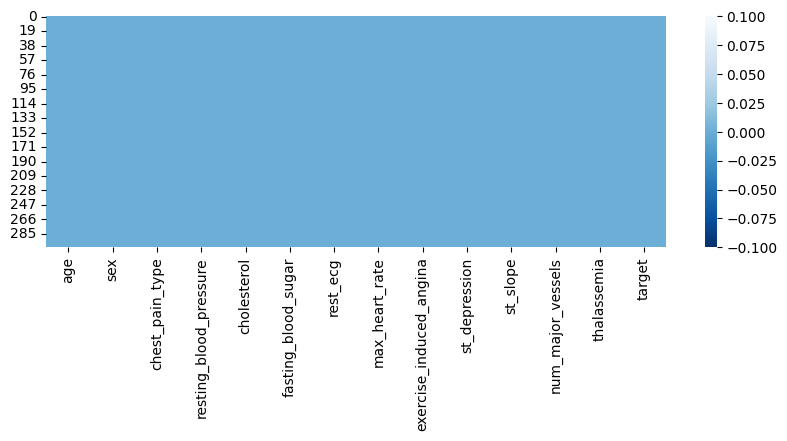

In [18]:
# check for missing values
print(df.isnull().sum())

plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

### Exploratory Data Analysis

##### Univariate Analysis

In [21]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

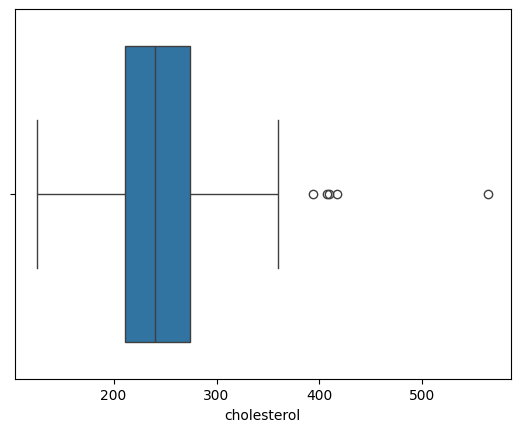

In [25]:
# check for outliers
sns.boxplot(x=df.cholesterol);

#### The cholesterol column contains some outliers

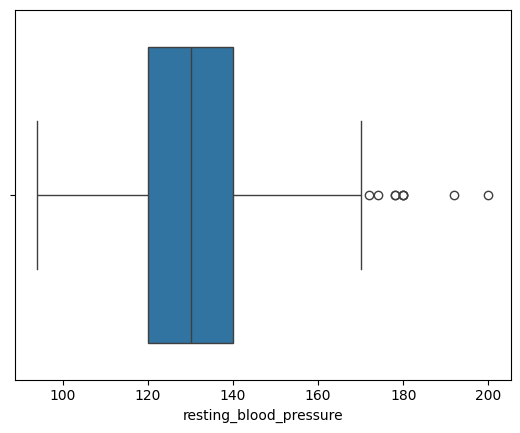

In [26]:
# check for outliers
sns.boxplot(x=df.resting_blood_pressure);

In [122]:
#### The resting-blood-pressure column also contains some outliers

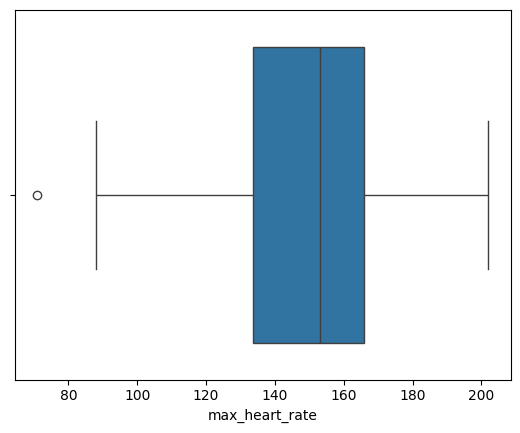

In [27]:
# check for outliers
sns.boxplot(x=df.max_heart_rate);

#### The max-heart-rate column contains some outliers

In [40]:
# create an age bracket for age feature

def age_group(x):
    if x <= 35:
        return '<= 35 Youth'
    elif x <= 55:
        return '36 - 55 Adult'
    elif x <= 65:
        return '<= 56 - 65 Old Adult'
    else:
        return '> 65 Elder'
    
# apply function to the the data
df['Age_gp'] = df['age'].apply(age_group)
df.head(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,Age_gp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,<= 56 - 65 Old Adult
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,36 - 55 Adult
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,36 - 55 Adult


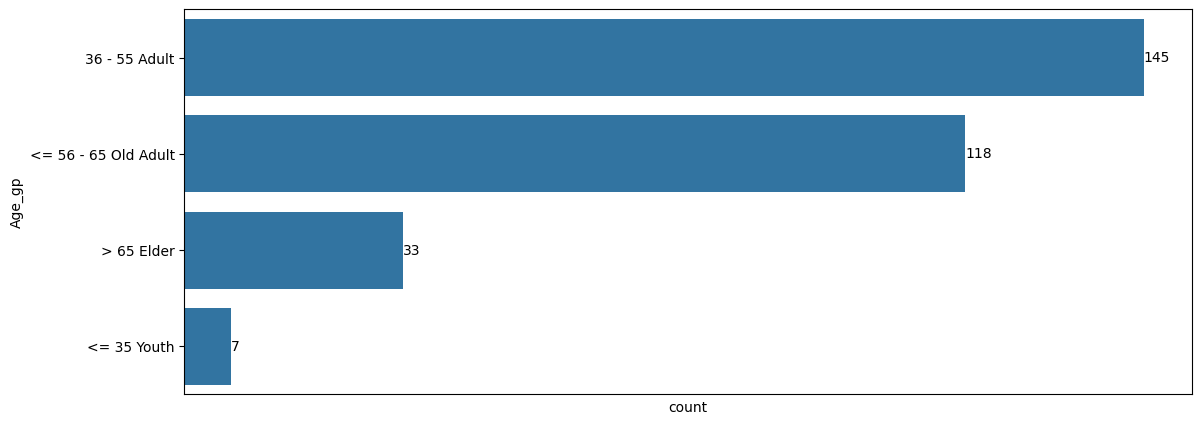

In [42]:
#total transactions by customer age group

plt.figure(figsize=(13, 5))
age_count = df.Age_gp.value_counts(ascending=False)
ax = sns.countplot(y=df['Age_gp'], order=age_count.index)
ax.bar_label(container=ax.containers[0], labels=age_count.values)
ax.xaxis.set_ticks([]);

#### Majority of the hospital's patient fall into the Adult (36 -55) age bracket. The youth (<= 35) age bracket have the least count in the hospital's record.

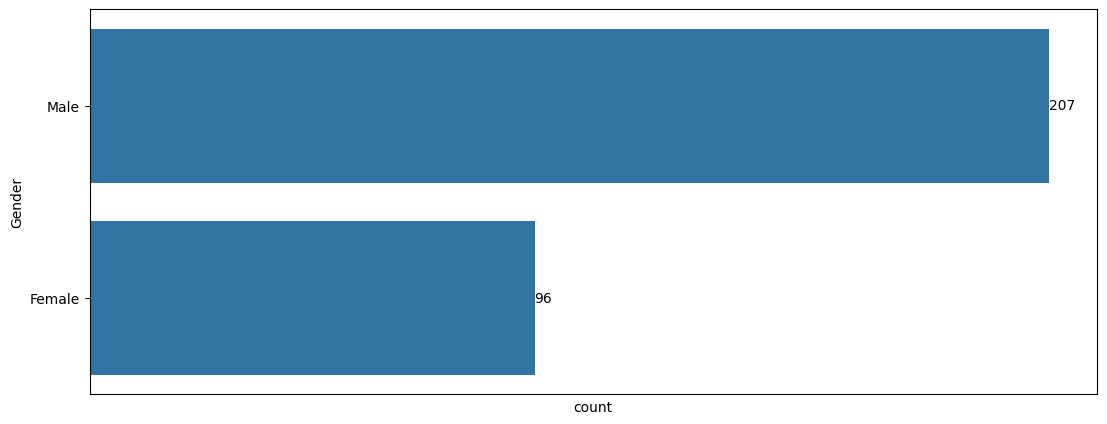

In [47]:
# convert sex column values into labels

def gender_name(x):
    if x == 1:
        return 'Male'
    else:
        return 'Female'
    
# apply function to the the data
df['Gender'] = df['sex'].apply(gender_name)
df.head(3)

#total transactions by customer gender
plt.figure(figsize=(13, 5))
Gender_count = df.Gender.value_counts(ascending=False)
ax = sns.countplot(y=df['Gender'], order=Gender_count.index)
ax.bar_label(container=ax.containers[0], labels=Gender_count.values)
ax.xaxis.set_ticks([]);

#### Majority of the patients at the hospital are male

[]

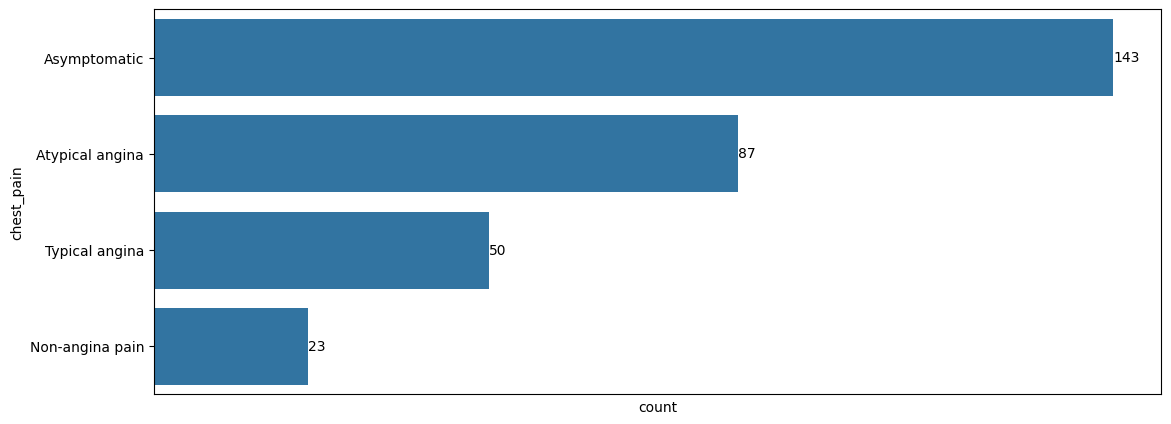

In [55]:
#### convert chest-pain-type feature values into labels
df.chest_pain_type.value_counts()

def chest_pain(x):
    if x == 1:
        return 'Typical angina'
    elif x == 2:
        return 'Atypical angina'
    elif x == 3:
        return 'Non-angina pain'
    else:
        return 'Asymptomatic'
    
# apply function to the the data
df['chest_pain'] = df['chest_pain_type'].apply(chest_pain)

#total chest pain level by customers
plt.figure(figsize=(13, 5))
chest_count = df.chest_pain.value_counts(ascending=False)
ax = sns.countplot(y=df['chest_pain'], order=chest_count.index)
ax.bar_label(container=ax.containers[0], labels=chest_count.values)
ax.xaxis.set_ticks([])

#### Most of the patients (143) are diagnosed with Asymptomatic chest pain type while only 23 of the patients have Non-angina pain

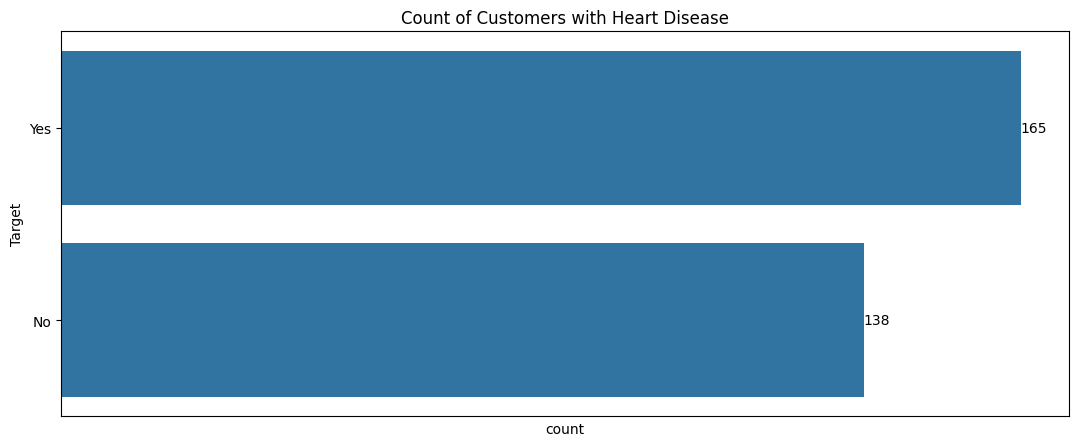

In [58]:
# convert target feature value into labels
df.target.value_counts()

def target_f(x):
    if x == 1:
        return 'Yes'
    else:
        return 'No'
    
# apply function to the the data
df['Target'] = df['target'].apply(target_f)

#total chest pain level by customers
plt.figure(figsize=(13, 5))
target_count = df.Target.value_counts(ascending=False)
ax = sns.countplot(y=df['Target'], order=target_count.index)
ax.bar_label(container=ax.containers[0], labels=target_count.values)
ax.xaxis.set_ticks([])
ax.set_title('Count of Customers with Heart Disease');

#### 165 of the hospital's patient have heart diseases wwhile 138 of the patients do not have any heart disease.

## Bivariate Analysis

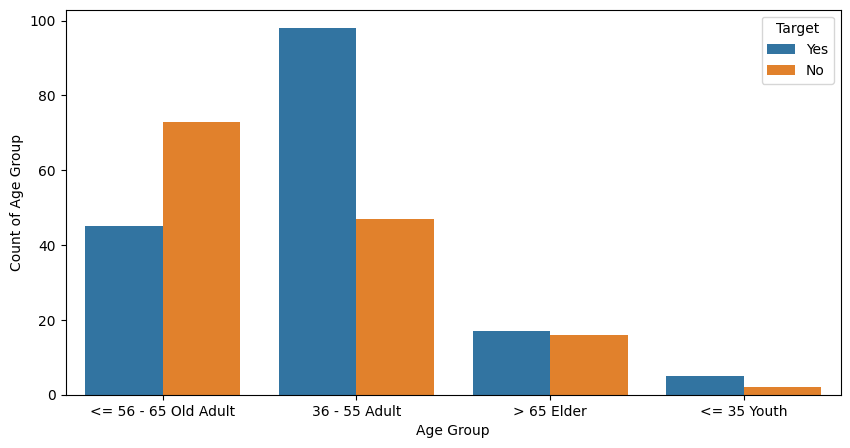

In [60]:
# age group and target feature relationship
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Age_gp'], hue=df['Target'])
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
ax.set_title('Total number of patients');

#### The adult (36-55) age bracket have more patients with heart disease while the Youth (<= 35) have the least amount of patients with heart disease

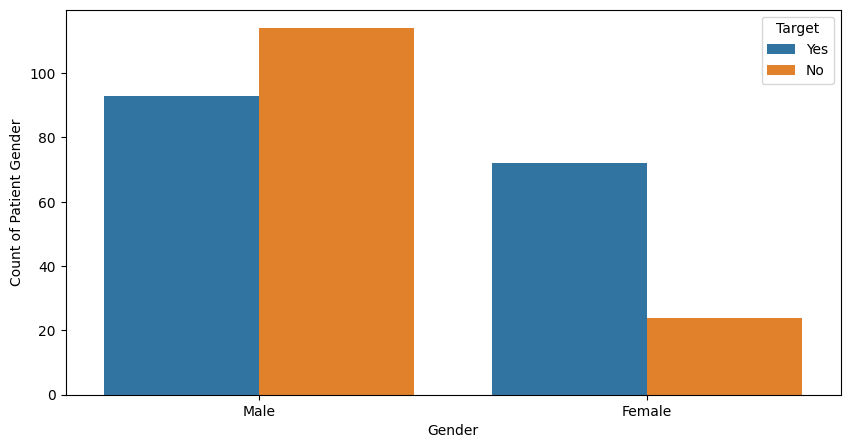

In [62]:
# gender and target feature relationship
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Gender'], hue=df['Target'])
plt.xlabel('Gender')
plt.ylabel('Count of Patient Gender')
ax.set_title('Total number of patients');

#### More males have heart disease than females

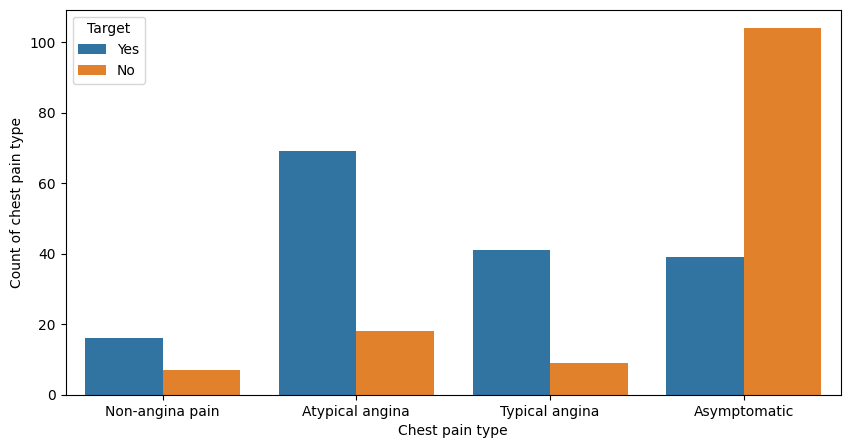

In [63]:
# chest pain type and target feature relationship

plt.figure(figsize=(10, 5))
sns.countplot(x=df['chest_pain'], hue=df['Target'])
plt.xlabel('Chest pain type')
plt.ylabel('Count of chest pain type')
ax.set_title('Total number of patients');

#### Patients with Atypical angina type of chest pain have a higher proportion of heart disease diagnosis than the other types of chest pain

## Multivariate analysis

In [66]:
df_num = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target']]

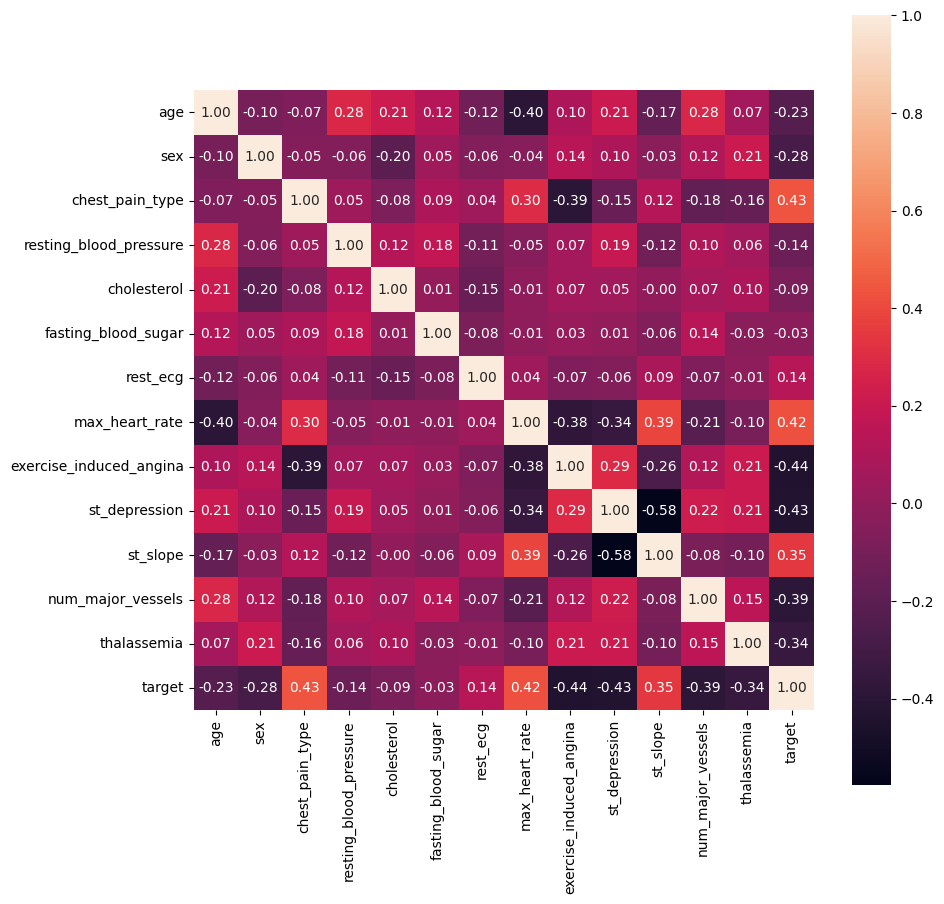

In [68]:
# correlation between target and other other variation in the dataset
plt.figure(figsize=(10,10))

sns.heatmap(df_num.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10});

#### The target feature have a positive correlation (weak) only with the chest-pain-type, st_slope, rest_ecg, max_heart_rate features.

#### Feature Engineering / Data Pre-processing

In [72]:
# Target feature is removed - acts as the test data
# the other features/column will be the training dataset
# unimportant features are removed

df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia']]
label = df[['target']]

In [73]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [74]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [76]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [77]:
# Dealing with outliers - 'resting_blood_pressure', 'cholesterol', 'thalassemia'

# Normalize the data
scaler = MinMaxScaler()

df1['Scaled_RBP'] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1['Scaled_chol'] = scaler.fit_transform(df1['cholesterol'].values.reshape(-1,1))
df1['Scaled_thal'] = scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))
df1['Scaled_maxHR'] = scaler.fit_transform(df1['max_heart_rate'].values.reshape(-1,1))

df1.drop(['resting_blood_pressure','thalassemia','max_heart_rate','cholesterol'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_maxHR
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


### Machine Learning

In [78]:
# split the data into training and testing sets: x-questions, y-answers
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [82]:
# Model building

# logistic regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
AUC-ROC: 0.8372844827586207


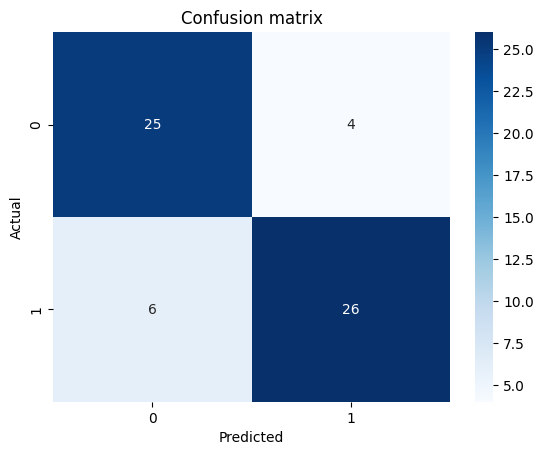

In [90]:
# create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

#### Insights from the consufion matrix - logistic regression
- the model predicted that 26 people have heart disease and 25 people do not have heart disease.
- it predicted that 6 patient do not have heart disease which is not so in the actual dataset.
- it predicted that 4 patient have heart disease which is false in the actual dataset

In [91]:
# Model Building
# Random forest classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1-score: 0.875
AUC-ROC: 0.8685344827586206


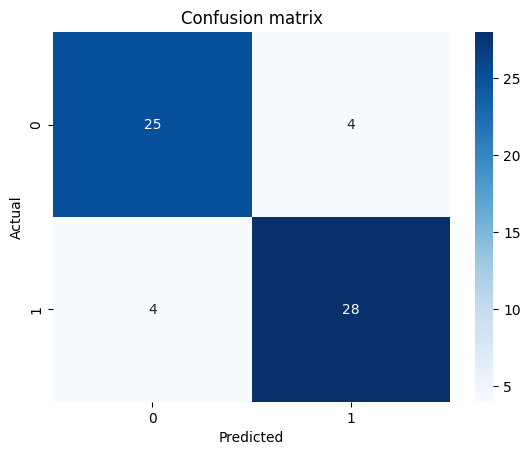

In [95]:
# create a confusion matrix
lcm = confusion_matrix(y_test, rfy_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

#### Insights from the consufion matrix - Random Forest Classifier
- the model predicted that 28 people have heart disease and 25 people do not have heart disease.
- it predicted that 4 patient do not have heart disease which is not so in the actual dataset.
- it predicted that 4 patient have heart disease which is false in the actual dataset

- Accuracy: 0.836 (83.6%) - This confirms the impression from the heatmap that the model makes correct predictions most of the time.
- Precision: 0.867 - This means that out of the instances predicted as having heart disease, 86.7% were truly positive. This indicates the model is good at avoiding false positives, which is potentially reassuring in this context.
- Recall: 0.812 - This signifies that the model identified 81.2% of the actual cases of heart disease. While lower than precision, it's still relatively high, showing the model doesn't miss too many positive cases.
- F1-score: 0.839 - This combines precision and recall into a single measure, and its value close to both precision and recall suggests a balanced performance between identifying true positives and avoiding false positives.
- AUC-ROC: 0.837 - This area under the receiver operating characteristic curve indicates the model's ability to discriminate between positive and negative cases. A value near 1 suggests good discrimination, which aligns with the other metrics.

- Overall: Combining the heatmap insights with these metrics, we can conclude that your model performs well in general, with good accuracy, precision, recall, and F1-score. It seems particularly good at avoiding false positives (predicting heart disease when it's not there), but could potentially be improved in catching more true positive cases (identifying existing heart disease).

In [102]:
# applying ML algorithm will be applied to the dataset
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [105]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}
con_mat = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifier[-1][1]:
        print("")

In [106]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeC

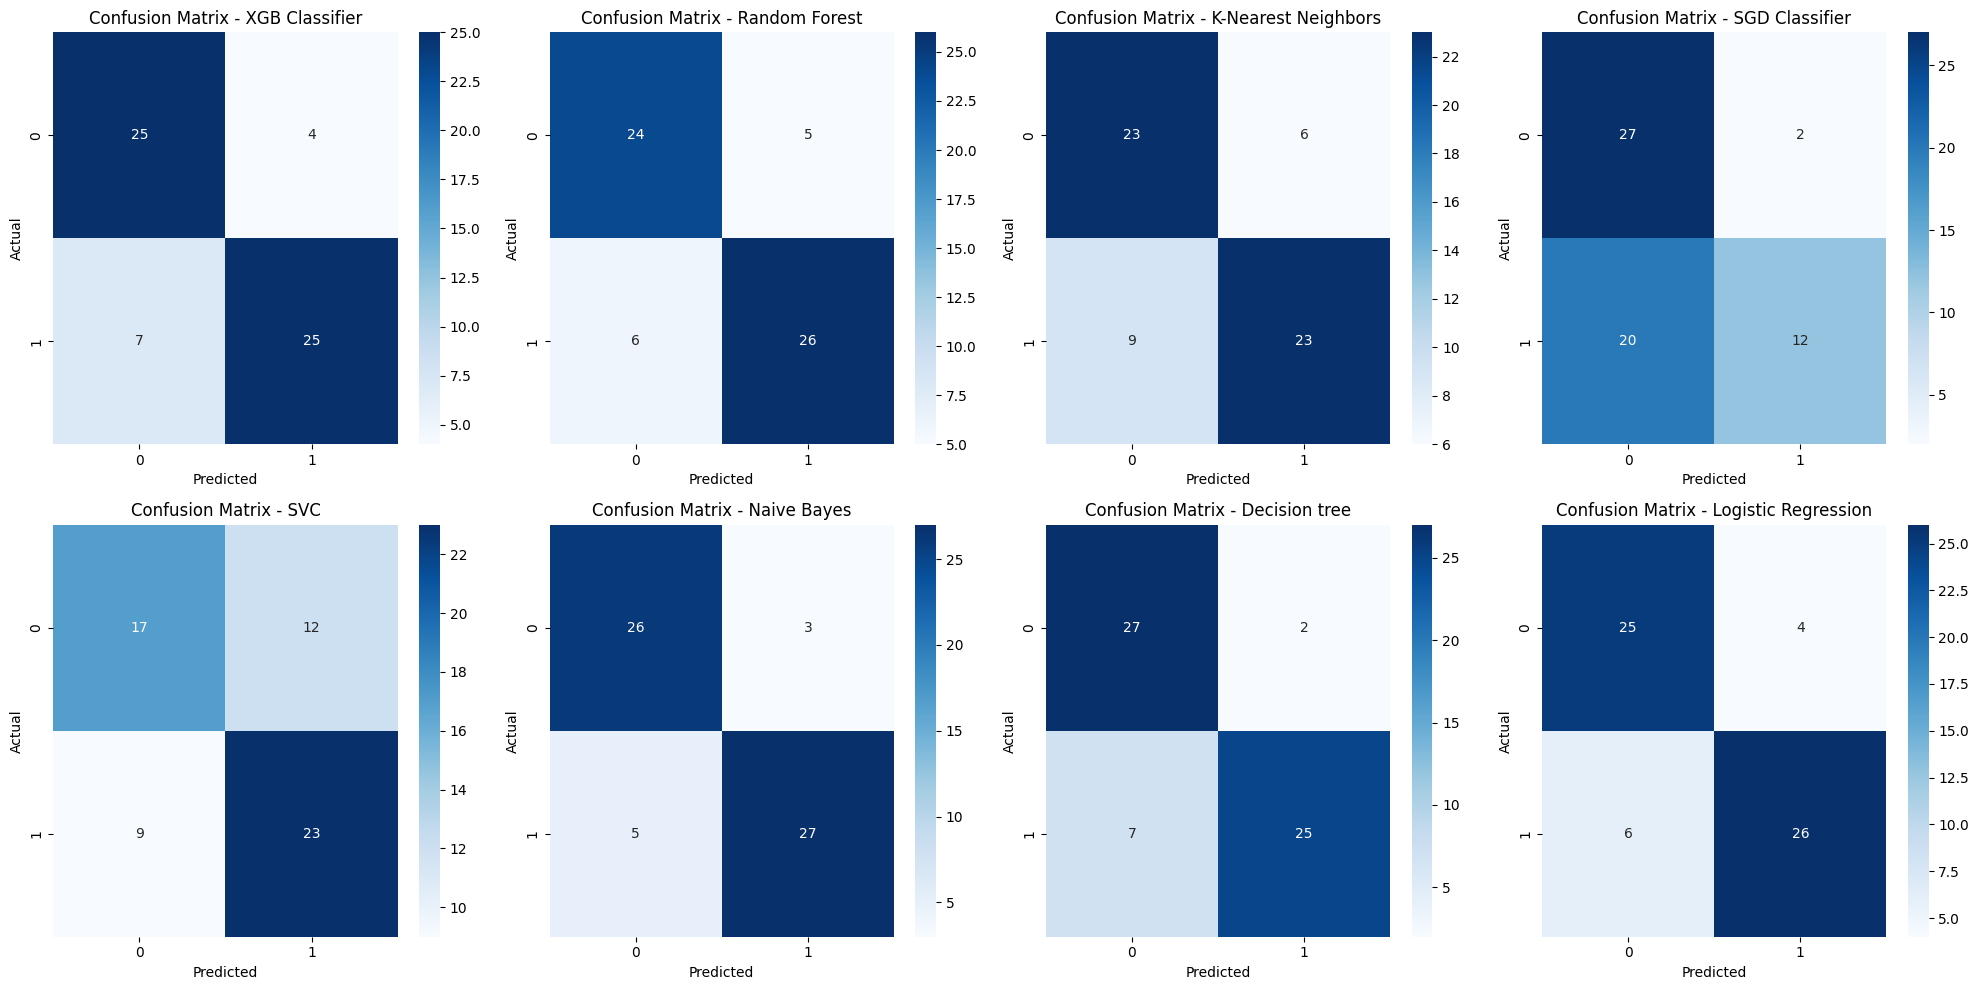

In [121]:
# Initialize dictionaries to store metrics and confusion matrices
metrics_dict = {'Accuracy': {}, 'Precision': {}, 'Recall': {}, 'ROC AUC': {}}
conf_matrices = {}

# Loop through each classifier
for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    # Make predictions
    pred = model.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    # Store metrics in dictionaries
    metrics_dict['Accuracy'][model_name] = round(acc * 100, 2)
    metrics_dict['Precision'][model_name] = round(precision * 100, 2)
    metrics_dict['Recall'][model_name] = round(recall * 100, 2)
    metrics_dict['ROC AUC'][model_name] = round(roc_auc * 100, 2)
    
    # Calculate confusion matrix
    conf_matrices[model_name] = confusion_matrix(y_test, pred)

# Convert dictionaries to DataFrames
acc_df = pd.DataFrame(metrics_dict['Accuracy'].items(), columns=['Model', 'Accuracy'])
precision_df = pd.DataFrame(metrics_dict['Precision'].items(), columns=['Model', 'Precision'])
recall_df = pd.DataFrame(metrics_dict['Recall'].items(), columns=['Model', 'Recall'])
roc_auc_df = pd.DataFrame(metrics_dict['ROC AUC'].items(), columns=['Model', 'ROC AUC'])

# Merge DataFrames on 'Model' column
combined_df = acc_df.merge(precision_df, on='Model').merge(recall_df, on='Model').merge(roc_auc_df, on='Model')

# Plot confusion matrices
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten axs to make it easier to index
axs = axs.flatten()

for i, (model_name, conf_matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axs[i])
    axs[i].set_title(f'Confusion Matrix - {model_name}')
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### When compared to the other models, the Naive Bayes Model has the best result for the confusion matrix.
- the model predicted that 27 people have heart disease and 26 people do not have heart disease.
- it predicted that 5 patient do not have heart disease which is not so in the actual dataset.
- it predicted that 3 patient have heart disease which is false in the actual dataset

In [111]:
result = pd.DataFrame(combined_df)
result

,Model,Accuracy,Precision,Recall,ROC AUC
0,XGB Classifier,81.97,86.21,78.12,82.17
1,Random Forest,85.25,84.85,87.50,85.13
2,K-Nearest Neighbors,75.41,79.31,71.88,75.59
3,SGD Classifier,73.77,86.36,59.38,74.52
4,SVC,65.57,65.71,71.88,65.25
5,Naive Bayes,86.89,90.00,84.38,87.02
6,Decision tree,85.25,92.59,78.12,85.61
7,Logistic Regression,83.61,86.67,81.25,83.73


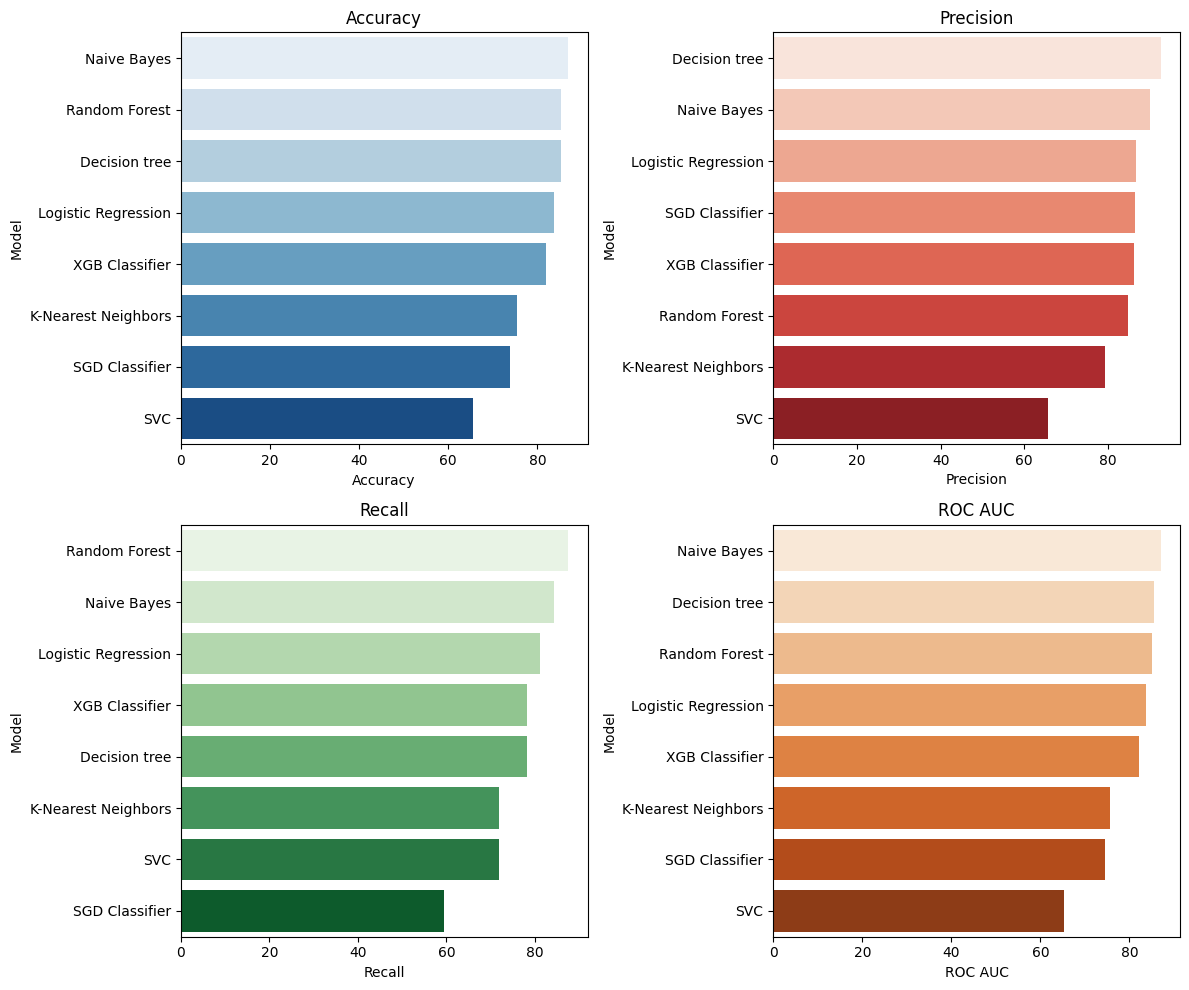

In [119]:
# Plotting chart for each metrics
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot for Accuracy
sns.barplot(x='Accuracy', y='Model', data=result.sort_values(by='Accuracy', ascending=False), ax=axs[0, 0], palette='Blues')
axs[0, 0].set_title('Accuracy')

# Plot for Precision
sns.barplot(x='Precision', y='Model', data=result.sort_values(by='Precision', ascending=False), ax=axs[0, 1], palette='Reds')
axs[0, 1].set_title('Precision')

# Plot for Recall
sns.barplot(x='Recall', y='Model', data=result.sort_values(by='Recall', ascending=False), ax=axs[1, 0], palette='Greens')
axs[1, 0].set_title('Recall')

# Plot for ROC AUC
sns.barplot(x='ROC AUC', y='Model', data=result.sort_values(by='ROC AUC', ascending=False), ax=axs[1, 1], palette='Oranges')
axs[1, 1].set_title('ROC AUC')

plt.tight_layout()
plt.show()

### Looking at the metrics provided:

- Accuracy: Naive Bayes has the highest accuracy at 86.89%, followed closely by Random Forest and Decision tree, both at 85.25%.
- Precision: Decision tree has the highest precision at 92.59%, followed by Naive Bayes at 90.00% and XGB Classifier at 86.21%.
- Recall: Random Forest has the highest recall at 87.50%, followed by Naive Bayes at 84.38% and XGB Classifier at 78.12%.
- ROC AUC: Naive Bayes has the highest ROC AUC at 87.02%, followed by Decision tree at 85.61% and Random Forest at 85.13%.

#### Considering these metrics, Naive Bayes seems to perform consistently well across all metrics and could be a strong candidate for selection.